<a href="https://colab.research.google.com/github/laharidevisetti/ML_PROJECT/blob/master/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Objective:
##### 1) To classify images of cats and dogs
##### 2) Build Convolutional Neural Networks
##### 3) Performance of the model


# Library Declaration

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing the Keras libraries and packages
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
!unzip "/content/drive/My Drive/SVECW_WISE_ML/M6/Practice Notebooks/cats_and_dogs_filtered"

Archive:  /content/drive/My Drive/SVECW_WISE_ML/M6/Practice Notebooks/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/train/cats/
  inflating: cats_and_dogs_filtered/train/cats/cat.0.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.1.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.10.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.100.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.101.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.102.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.103.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.104.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.105.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.106.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.107.jpg  
  inflating: cats_and_dogs_filtered/train/cats/cat.108.jpg  
  inflating: cats_and_dogs_filtered/train/cats/c

# Data Loading

In [0]:
base_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
print(f"Training cat images: {num_cats_tr}")
print(f"Training dog images: {num_dogs_tr}")
print(f"Validation cat images: {num_cats_val}")
print(f"Validation dog images: {num_dogs_val}")
print(f"Training images: {total_train}")
print(f"Validtion images: {total_val}")

Training cat images: 1000
Training dog images: 1000
Validation cat images: 500
Validation dog images: 500
Training images: 2000
Validtion images: 1000


# Setting Model Parameters

In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Model Creation

In [0]:
# Initialising the CNN
classifier = Sequential()

In [0]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

In [0]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(2, 2))

In [0]:
# Step 1 & 2 with more hidden layers
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

classifier.add(Conv2D(128, (3,3), activation='relu'))
classifier.add(MaxPooling2D(2,2))

In [0]:
# Step 3 - Dropout
classifier.add(Dropout(0.5))

Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
# Step 4 - Flattening
classifier.add(Flatten())

In [0]:
# Step 5 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dense(units = 2, activation = 'softmax'))

In [0]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

# Data Augmentation and Preparation

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [0]:
training_set = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
validation_set = validation_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                        directory=validation_dir,
                                                        target_size=(IMG_SHAPE, IMG_SHAPE),
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


# Train the model

In [0]:
epochs=100
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 18s 897ms/step - loss: 0.7024 - accuracy: 0.5060 - val_loss: 0.6872 - val_accuracy: 0.5160
Epoch 2/100
20/20 [==============================] - 15s 766ms/step - loss: 0.6867 - accuracy: 0.5415 - val_loss: 0.6729 - val_accuracy: 0.5290
Epoch 3/100
20/20 [==============================] - 16s 776ms/step - loss: 0.6888 - accuracy: 0.5265 - val_loss: 0.6785 - val_accuracy: 0.5240
Epoch 4/100
20/20 [==============================] - 15s 773ms/step - loss: 0.6677 - accuracy: 0.5820 - val_loss: 0.6706 - val_accuracy: 0.6010
Epoch 5/100
20/20 [==============================] - 15s 774ms/step - loss: 0.6522 - accuracy: 0.5960 - val_loss: 0.5977 - val_accuracy: 0.6310
Epoch 6/100
20/20 [==============================] - 15s 770ms/step - loss: 0.6544 - accuracy: 0.6075 - val_loss: 0.6567 - val_accuracy: 0.5420
Epoch 7/100
20/20 [==============================] - 15s 774ms/step - loss: 0.6853 - accuracy: 0.5485 - val_loss: 0.6731 - val_accuracy:

# Training Result Visualization

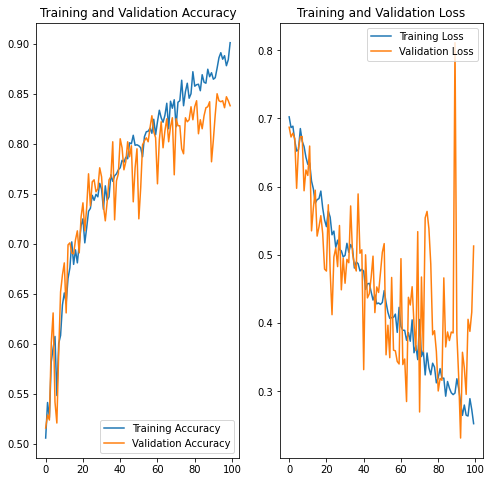

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()